In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading the pokemon dataset

In [18]:
poke_df = pd.read_csv("pokemon.zip", index_col = "Name")

In [19]:
poke_df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [20]:
poke_df.shape

(800, 12)

In [21]:
y_all = poke_df.Legendary.astype("int")

In [22]:
cat_cols = ["Type 1", "Type 2", "Generation"]
num_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text

In [24]:
import sklearn
print (sklearn.__version__)

0.21.3


# Decision Tree

In [25]:
X_all = poke_df.drop(["Legendary", "#"], axis = 1).copy()

In [26]:
X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

In [27]:
X_all.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ivysaur,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Venusaur,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
VenusaurMega Venusaur,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Charmander,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

In [29]:
mdl = DecisionTreeClassifier(random_state = 777)

In [30]:
mdl.fit(Xtr, ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=777, splitter='best')

In [31]:
preds = mdl.predict_proba(Xte)[:, 1]

In [32]:
score = roc_auc_score(yte, preds)
score

0.8733843313109997

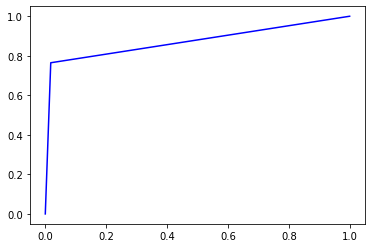

In [17]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [33]:
#https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [34]:
graph = Source(export_graphviz(mdl, out_file=None
   , feature_names=X_all.columns, class_names=['Common', 'Legendary'] 
   , filled = True))

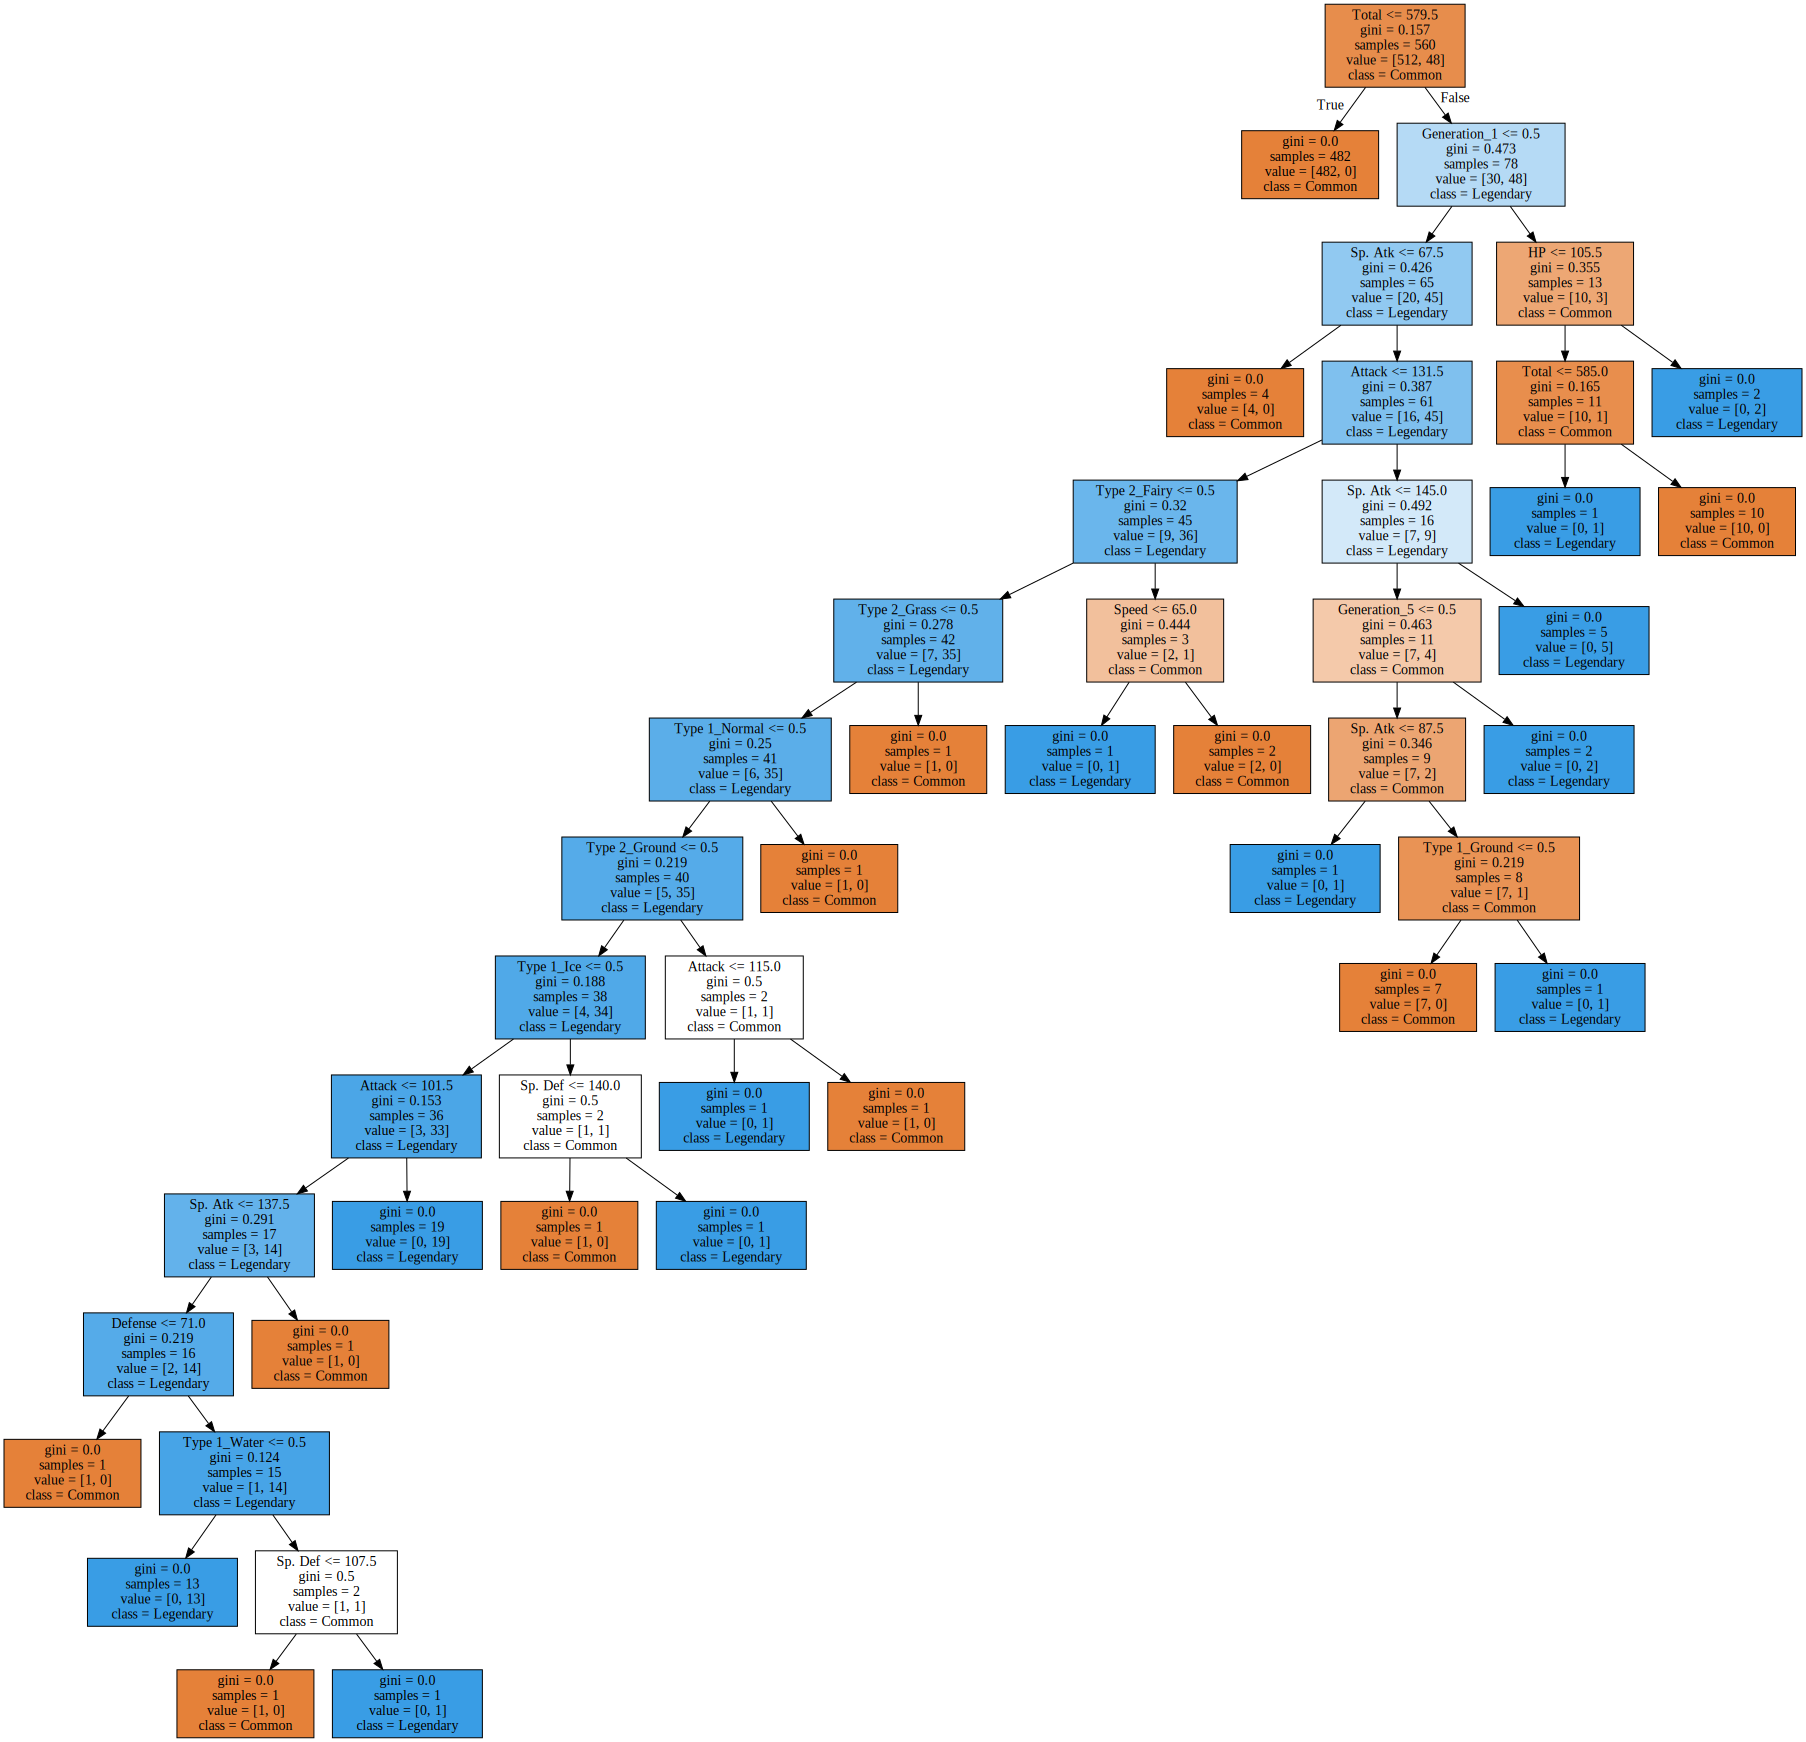

In [35]:
display(SVG(graph.pipe(format='svg')))

In [36]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


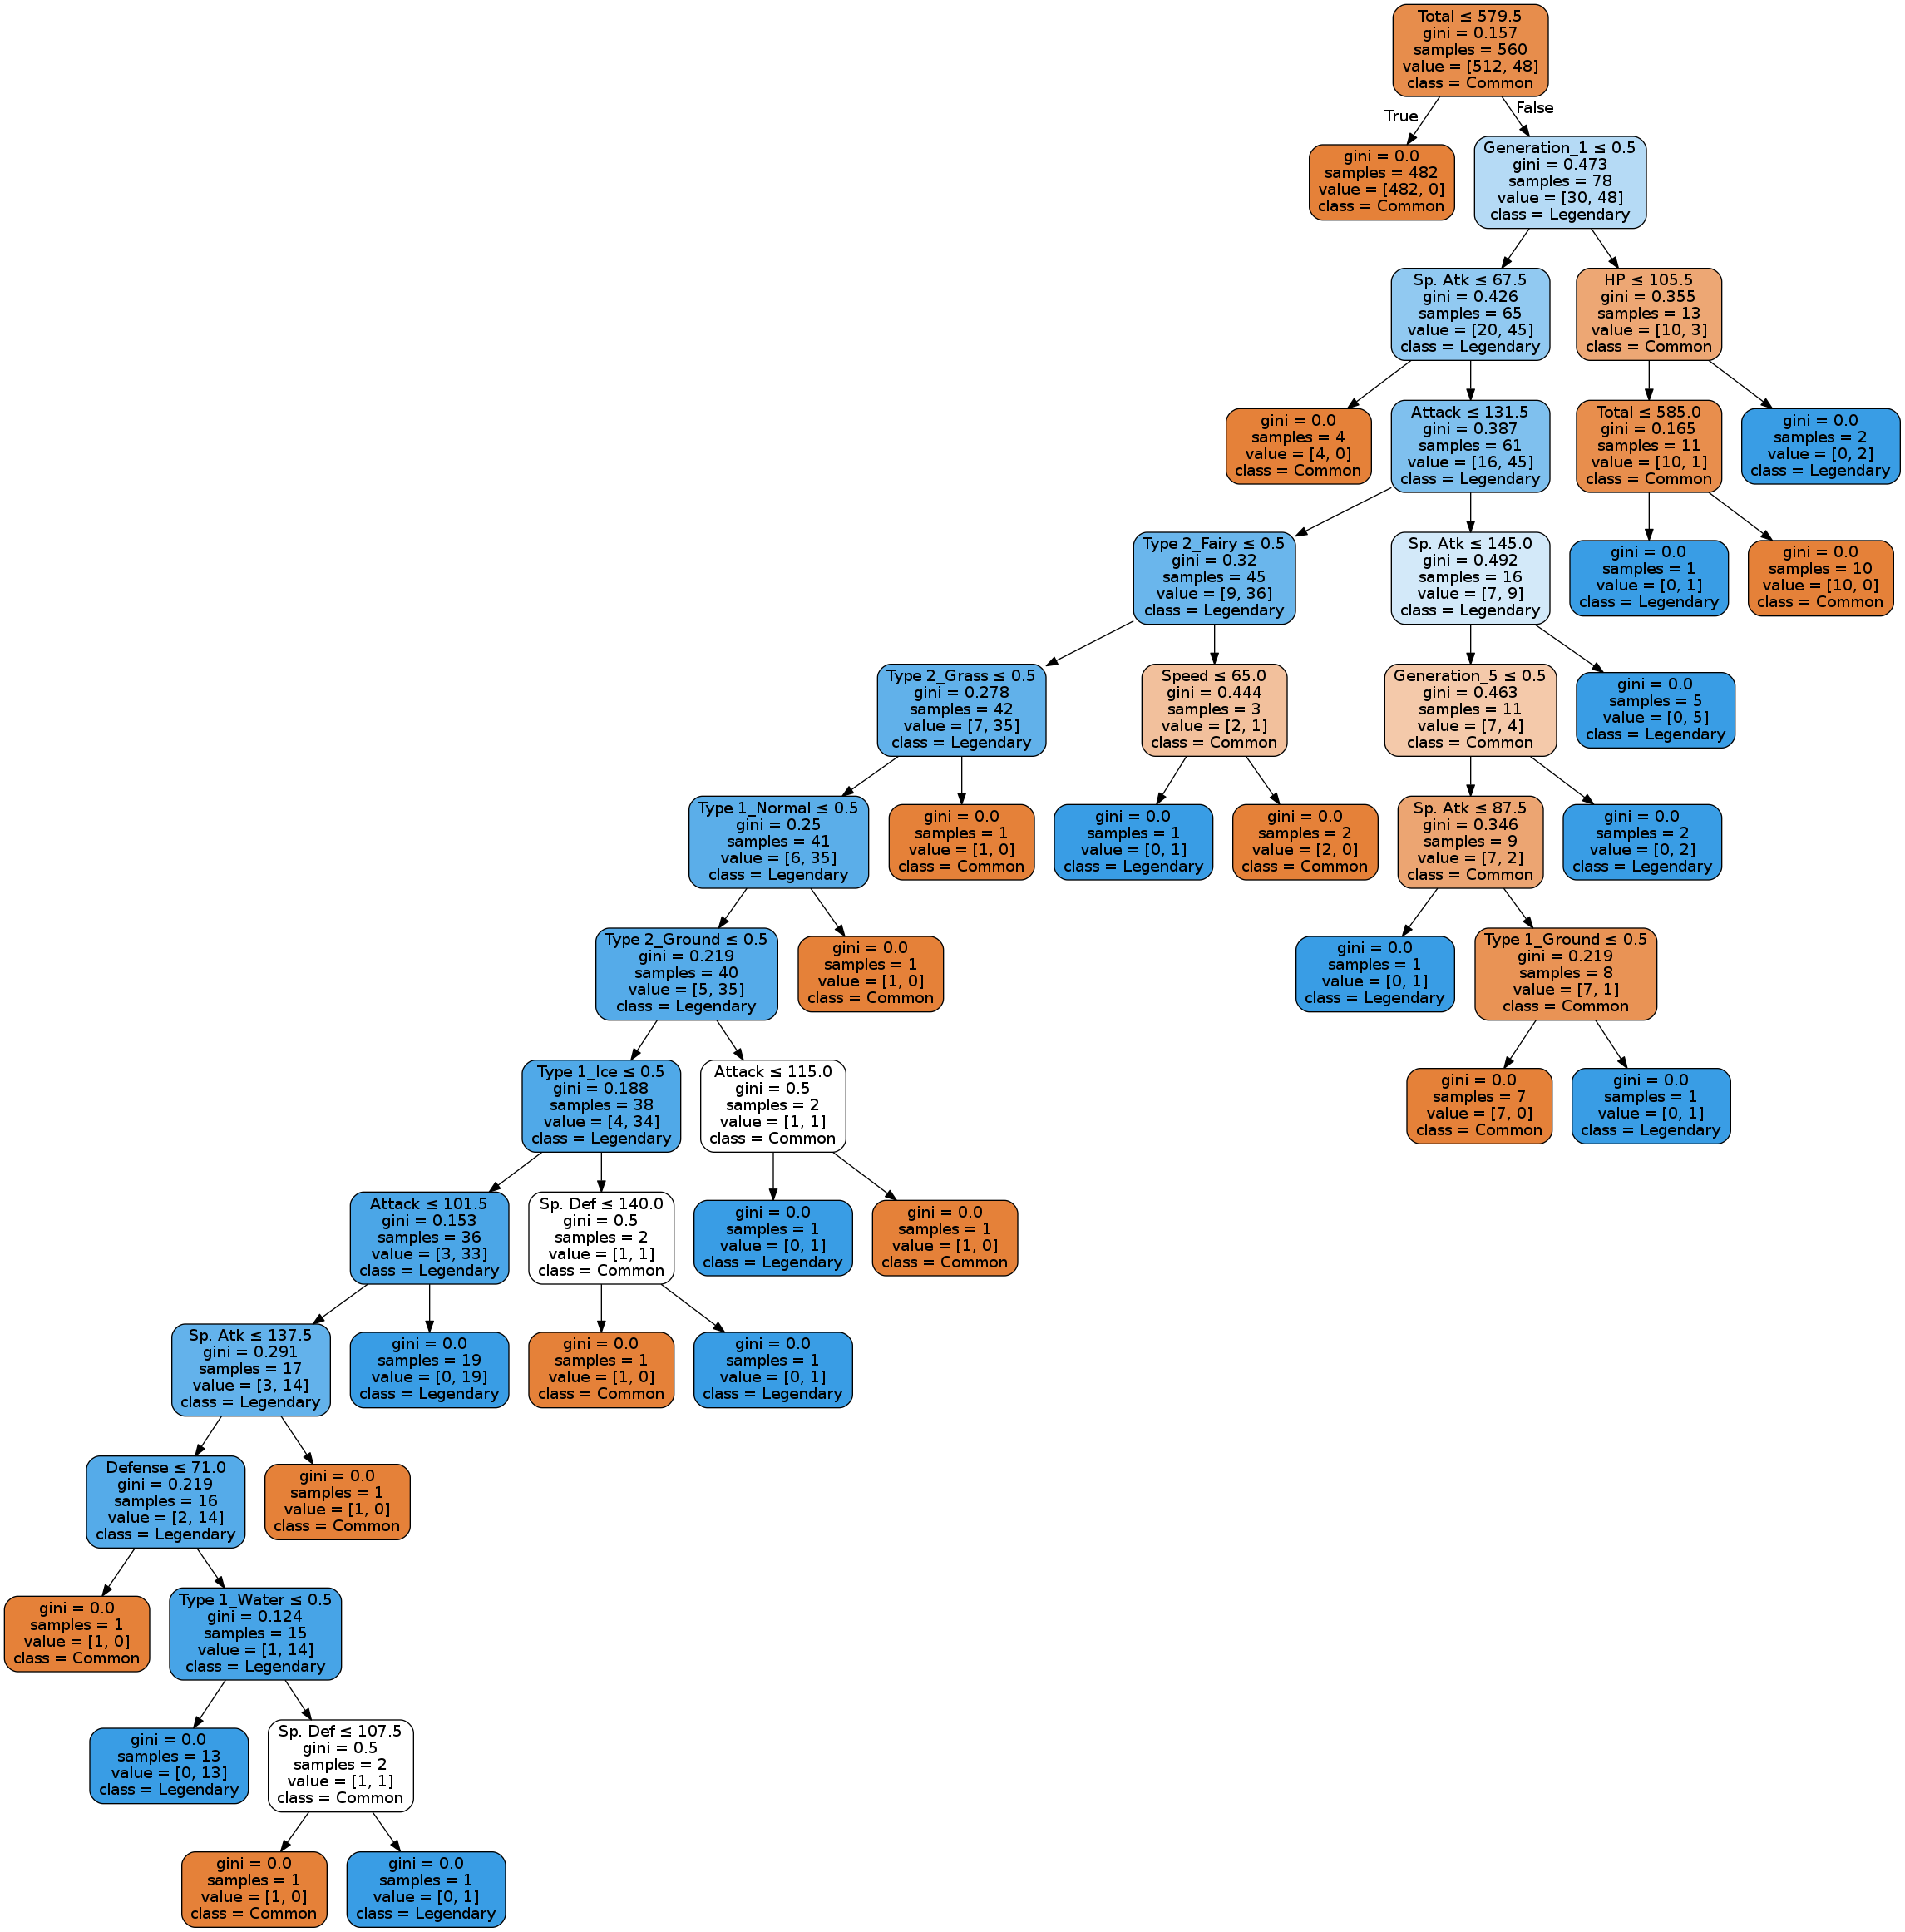

In [37]:
dot_data = StringIO()
export_graphviz(mdl, out_file=dot_data,  
                feature_names=X_all.columns, 
                class_names=['Common', 'Legendary'], 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
print(export_text(mdl, feature_names=X_all.columns.tolist()))

|--- Total <= 579.50
|   |--- class: 0
|--- Total >  579.50
|   |--- Generation_1 <= 0.50
|   |   |--- Sp. Atk <= 67.50
|   |   |   |--- class: 0
|   |   |--- Sp. Atk >  67.50
|   |   |   |--- Attack <= 131.50
|   |   |   |   |--- Type 2_Fairy <= 0.50
|   |   |   |   |   |--- Type 2_Grass <= 0.50
|   |   |   |   |   |   |--- Type 1_Normal <= 0.50
|   |   |   |   |   |   |   |--- Type 2_Ground <= 0.50
|   |   |   |   |   |   |   |   |--- Type 1_Ice <= 0.50
|   |   |   |   |   |   |   |   |   |--- Attack <= 101.50
|   |   |   |   |   |   |   |   |   |   |--- Sp. Atk <= 137.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Sp. Atk >  137.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Attack >  101.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Type 1_Ice >  0.50
|   |   |   |   |   |   |   |   |   |--- Sp. Def <= 1

# Logistic Regression

In [58]:
X_all = poke_df.drop(["Legendary", "#"], axis = 1).copy()

In [59]:
X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

In [60]:
X_all.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ivysaur,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Venusaur,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
VenusaurMega Venusaur,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Charmander,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
X_all.shape

(800, 49)

In [62]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler

In [63]:
X_all.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ivysaur,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Venusaur,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
VenusaurMega Venusaur,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Charmander,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

In [66]:
scaler = StandardScaler()
Xtr = Xtr.copy()
Xtr[num_cols]  = scaler.fit_transform(Xtr[num_cols])

In [67]:
Xte = Xte.copy()
Xte[num_cols]  = scaler.transform(Xte[num_cols])

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
mdl = LogisticRegression(penalty = "l1", solver = "liblinear")

In [70]:
mdl.fit(Xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
preds = mdl.predict_proba(Xte)[:, 1]

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve

In [79]:
score = roc_auc_score(yte, preds)
score

0.9694012134001583

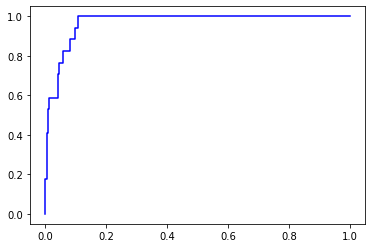

In [80]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [81]:
mdl.coef_.shape

(1, 49)

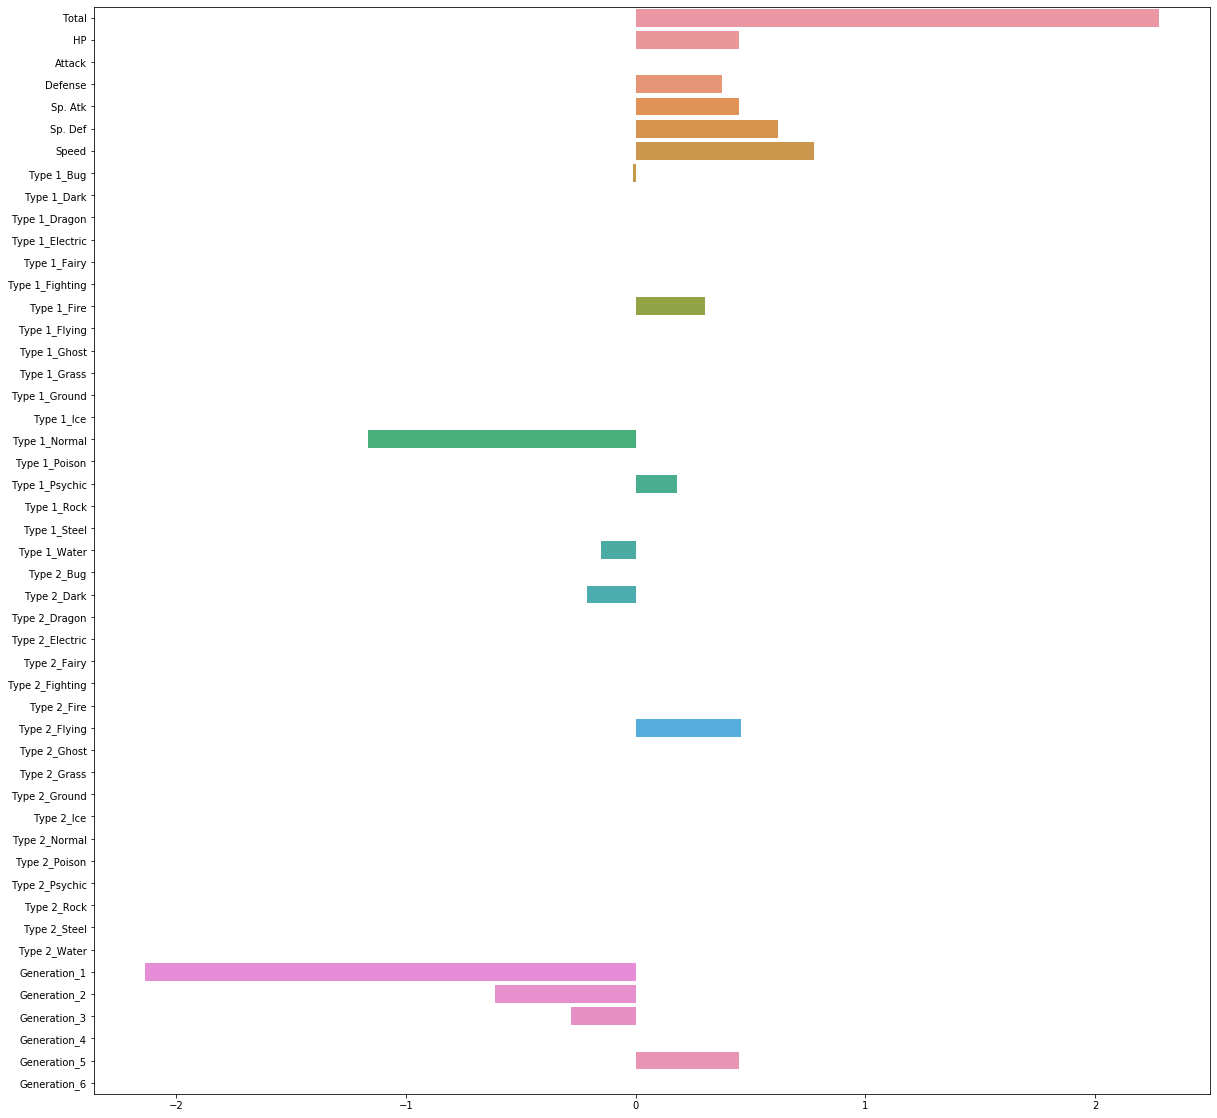

In [45]:
plt.figure(figsize= (20,20))

sns.barplot(y = X_all.columns, x = mdl.coef_[0, :])

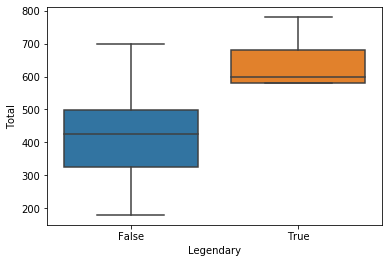

In [46]:
sns.boxplot(y = poke_df.Total, x = poke_df.Legendary)

# RandomForrest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
X_all = poke_df.drop(["Legendary", "#"], axis = 1).copy()

X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

In [84]:
mdl = RandomForestClassifier(n_estimators = 100, random_state = 777)

In [85]:
mdl.fit(Xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [86]:
preds = mdl.predict_proba(Xte)[:, 1]

In [87]:
score = roc_auc_score(yte, preds)
score

0.9824584542337114

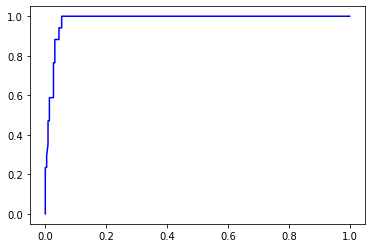

In [88]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [89]:
mdl.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=655685735, splitter='best')

In [91]:
def draw_tree(ntree):
    dot_data = StringIO()
    export_graphviz(mdl.estimators_[ntree], out_file=dot_data,  
                    feature_names=X_all.columns, 
                    class_names=['Common', 'Legendary'], 
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

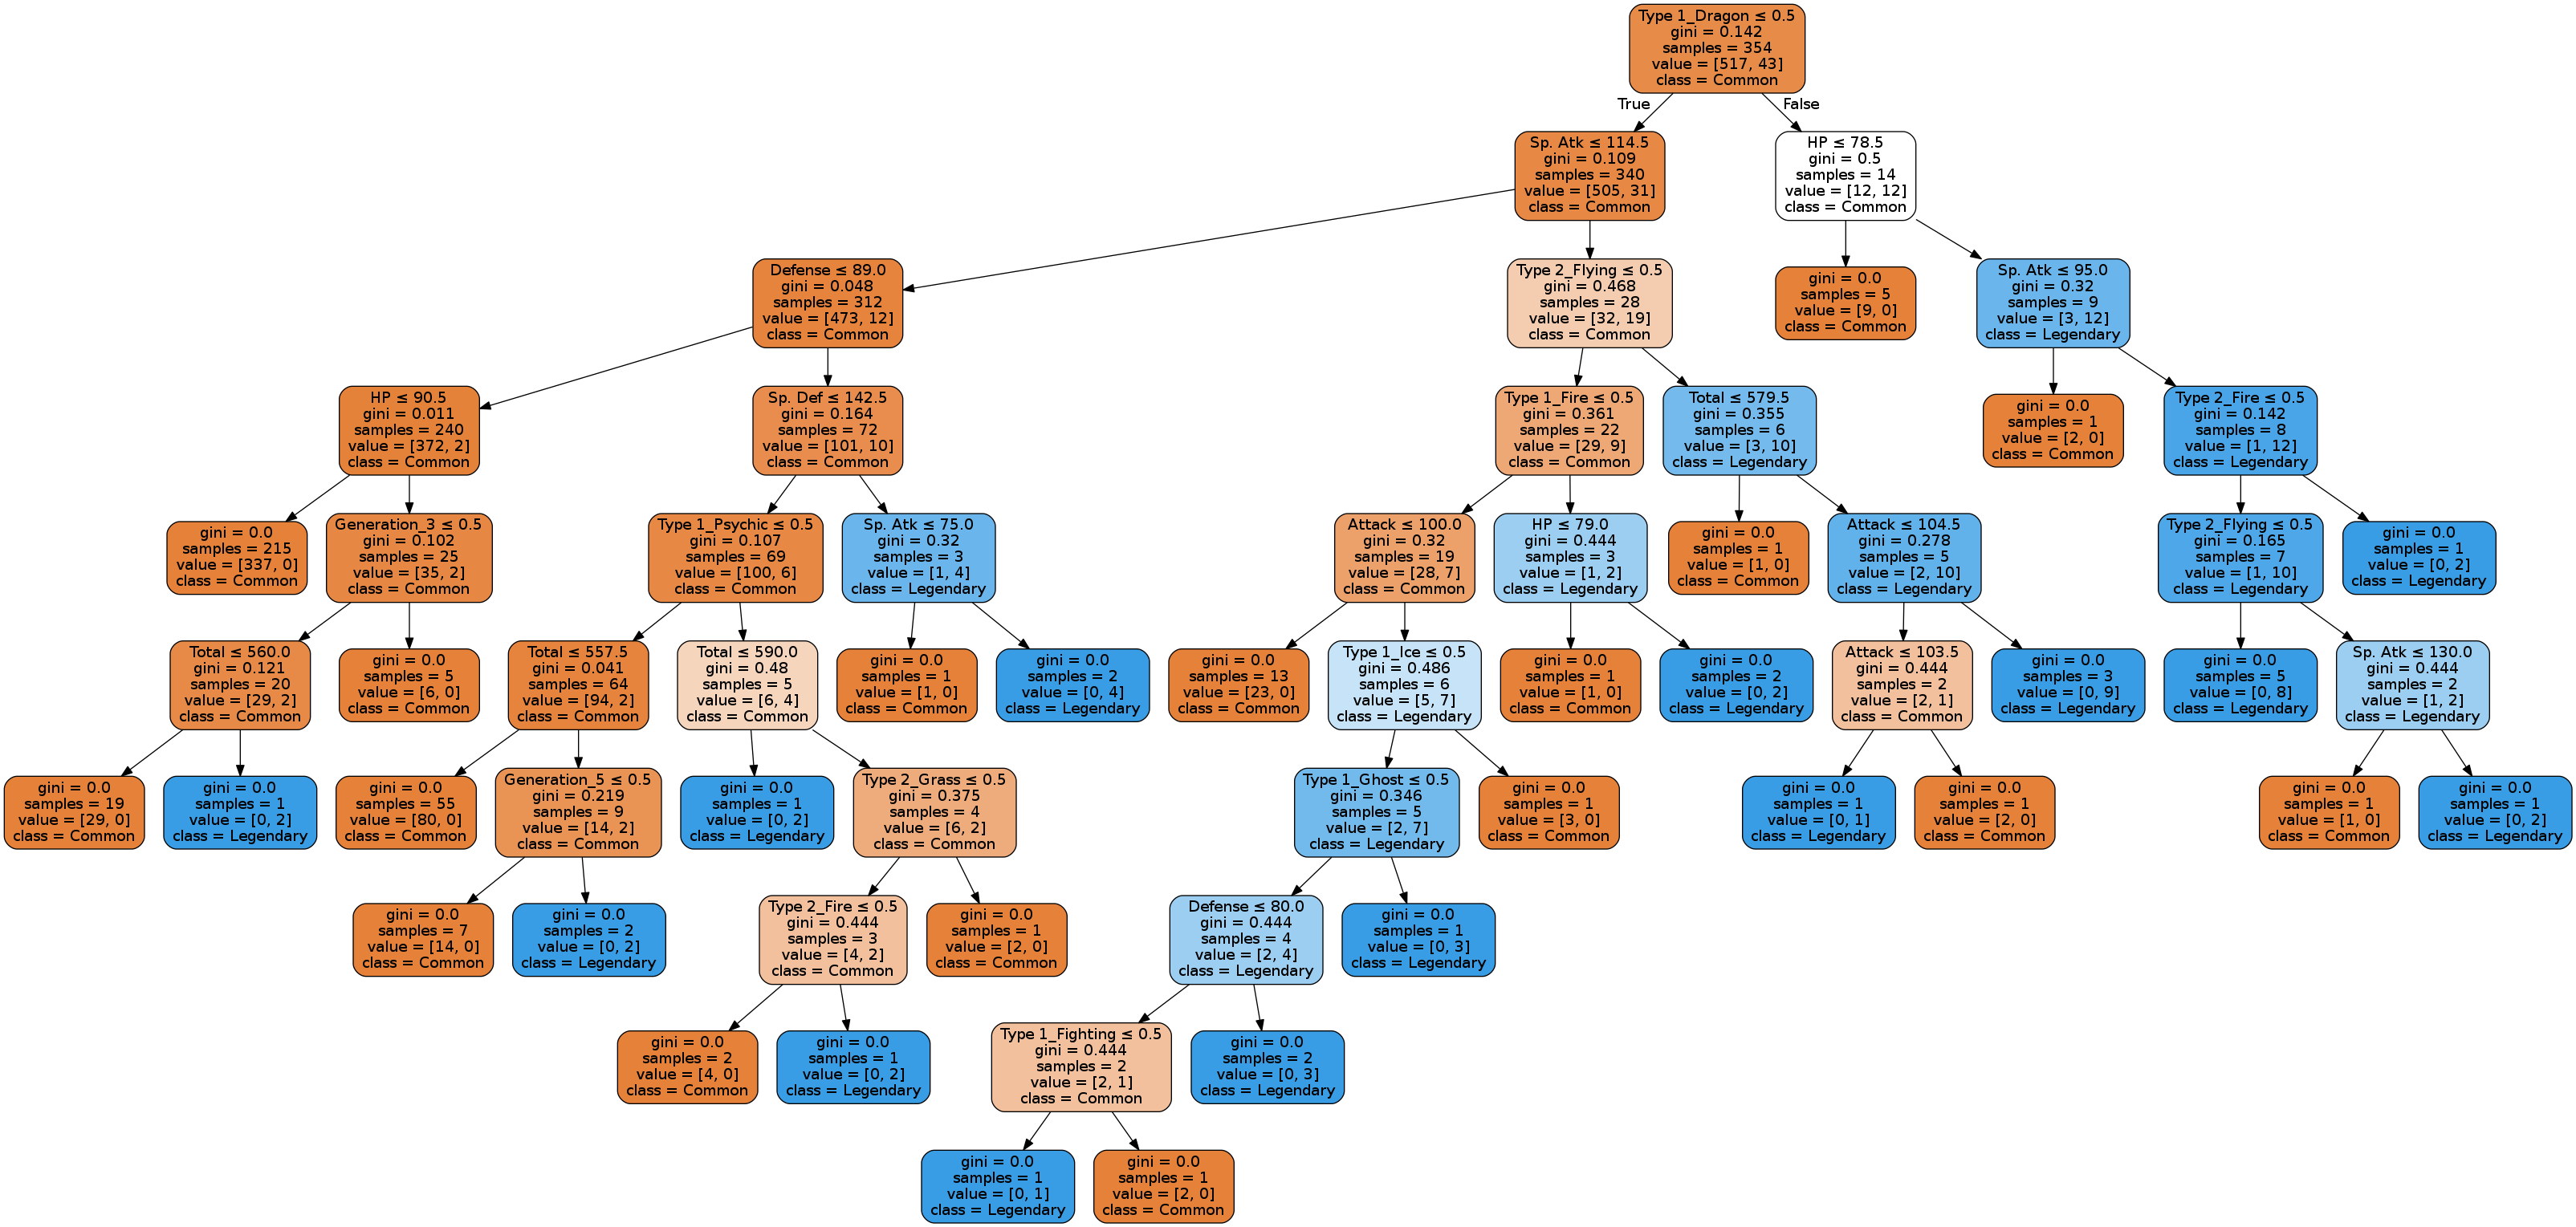

In [93]:
draw_tree( 0)

In [94]:
from ipywidgets import interact
import ipywidgets as widgets

In [95]:
interact(draw_tree, ntree = widgets.IntText(min=0, max = 100, value = 0))

interactive(children=(IntText(value=0, description='ntree'), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_tree(ntree)>

In [49]:
mdl.feature_importances_

array([2.50797925e-01, 9.82007499e-02, 7.79106972e-02, 7.46049170e-02,
       1.24613865e-01, 8.13181595e-02, 1.11915835e-01, 2.16421286e-03,
       2.45325480e-03, 1.49974735e-02, 1.87046787e-03, 1.39994845e-03,
       1.62366368e-03, 5.62731926e-03, 3.33903151e-03, 1.24143145e-03,
       4.73590519e-03, 3.94501423e-03, 2.38927881e-03, 6.22299028e-03,
       1.45878215e-04, 9.98262319e-03, 2.01928635e-03, 4.78140933e-03,
       8.37695459e-03, 0.00000000e+00, 1.31141072e-03, 2.40450912e-03,
       0.00000000e+00, 2.56795113e-03, 5.17406635e-03, 3.80675642e-03,
       8.77042779e-03, 1.66065080e-03, 2.98616825e-03, 2.73547887e-03,
       2.99649311e-03, 2.67506564e-04, 1.34316731e-03, 6.52979416e-03,
       6.46680706e-04, 3.58855205e-03, 1.70621111e-03, 1.78534141e-02,
       6.12417935e-03, 7.17824398e-03, 9.93629460e-03, 9.46105380e-03,
       4.27269716e-03])

## The final feature importance, at the Random Forest level, is it’s average over all the trees. The sum of the feature’s importance value on each trees is calculated and divided by the total number of trees

[Link](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

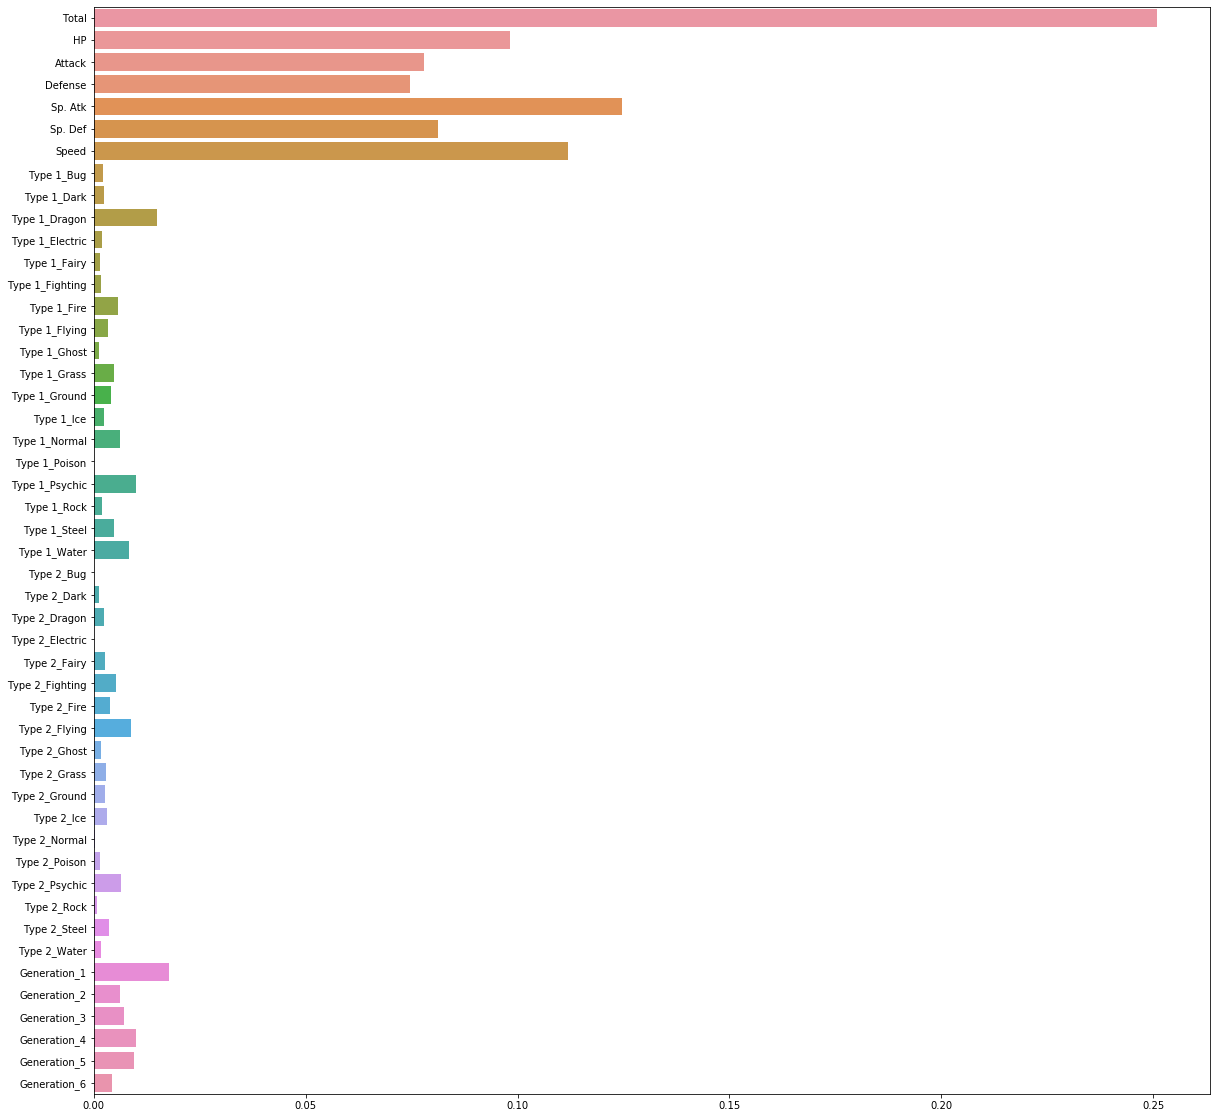

In [52]:
plt.figure(figsize = (20,20))

sns.barplot(x = mdl.feature_importances_, y = X_all.columns.tolist())

## Adding random noise

In [96]:
X_all = poke_df.drop(["Legendary", "#"], axis = 1).copy()

X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

X_all["Noise"] = np.random.randint(X_all.Total.min(), X_all.Total.max(), X_all.shape[0])

Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

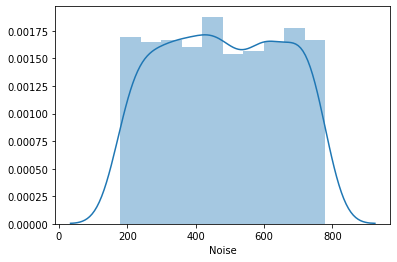

In [97]:
sns.distplot(X_all.Noise)

In [98]:
mdl = RandomForestClassifier(n_estimators = 100, random_state = 777)

mdl.fit(Xtr, ytr)

preds = mdl.predict_proba(Xte)[:, 1]

score = roc_auc_score(yte, preds)
score

0.9814033236613031

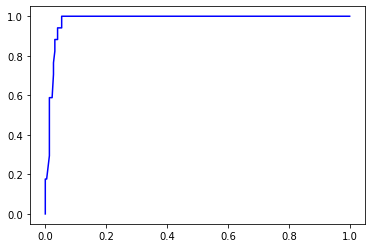

In [99]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

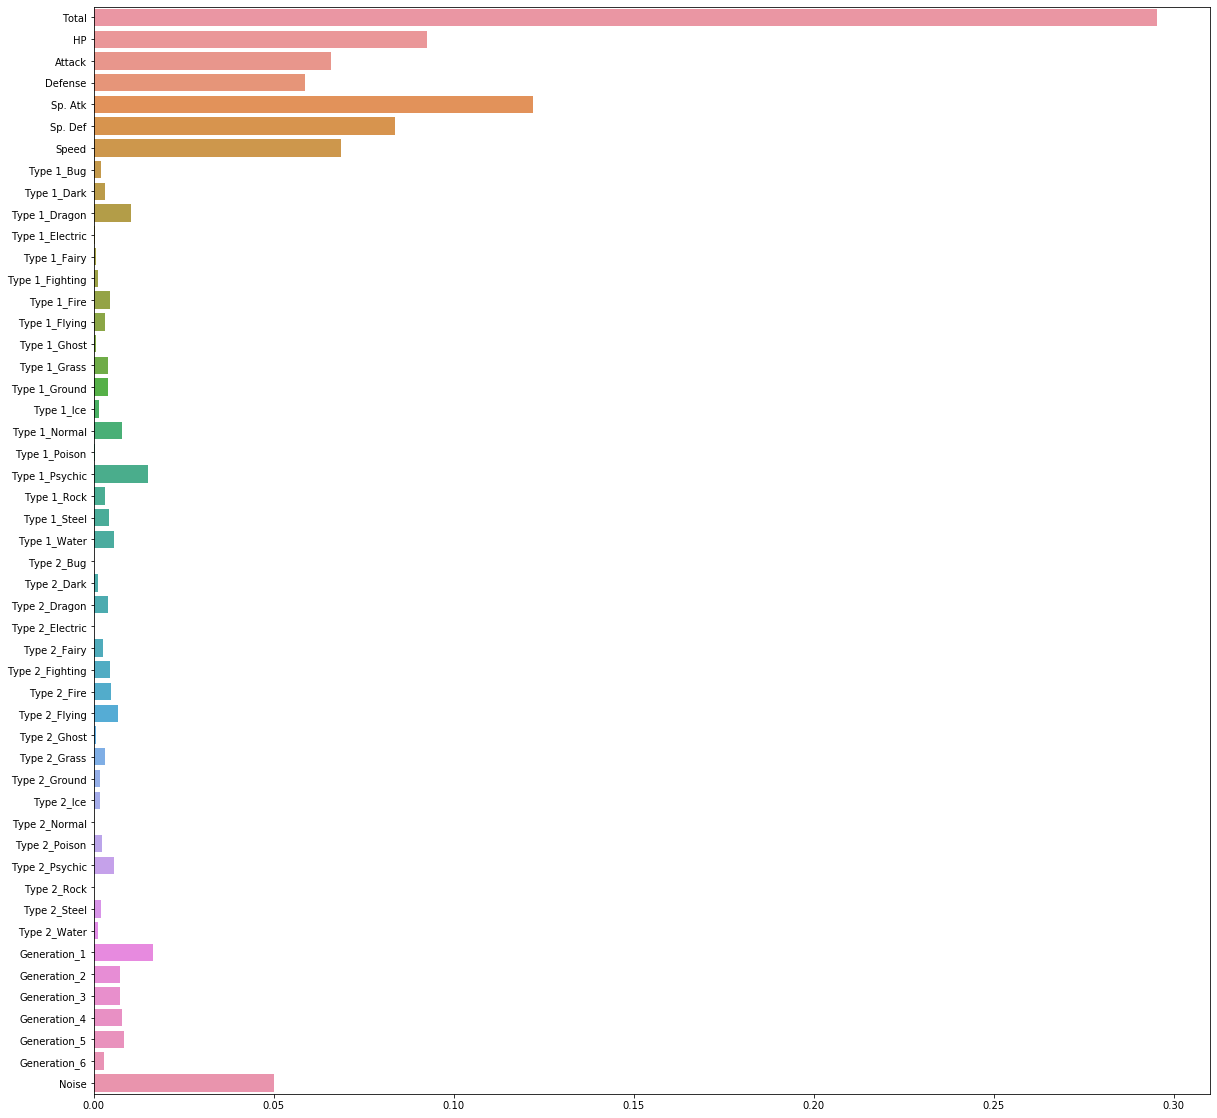

In [100]:
plt.figure(figsize = (20,20))

sns.barplot(x = mdl.feature_importances_, y = X_all.columns.tolist())